<a href="https://colab.research.google.com/github/yooseungjun/ML/blob/main/3%EC%9E%A5_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**03-1 K-최근접 이웃 회귀**

# **정보**
-**지도학습 알고리즘** : 회귀 + 분류
 - 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 것
 - 회귀 : 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 것   

-**KNN(K-Nearest Neighbor) 알고리즘**
 - KNN 분류
 - KNN 회귀

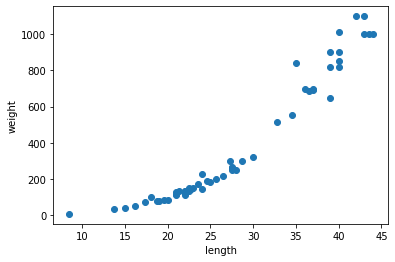

(42,) (14,)


In [8]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt

"""농어의 길이만 점찍어서 관찰해보기"""
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
"""--------------------------------"""

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

```
#사이킷런에 사용할 훈련 세트는 2차원 배열 이어야 한다.
test_array = np.array([1,2,3,4])
print(test_array.shape) # (4,)
test_array = test_array.reshape(2,2)
print(test_array.shape) # (2,2)

#reshape()매서드는 지정한 크기가 원본 배열에 있는 원소의 개수와 다르면 에러
#(4,)인 배열을 (2,3)으로 만들려고 하면 오류발생
test_array = test_array.reshape(2,3) #ValueError: cannot reshape ~

#reshape()함수에 그기를 -1로 지정 -> 나머지 원소 개수로 모두 채우겠다는 의미
np.array([1,2,3,4]).shape # (4,)
np.array([1,2,3,4]).reshape(-1,1) # (4,1)
```



In [13]:
#훈련,테스트 데이터들 2차원 배열로 설정
print(train_input.shape, test_input.shape) # (42,) (14,)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape) # (42,1) (14,1)

(42, 1) (14, 1)
(42, 1) (14, 1)


In [14]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(train_input, train_target) #결정계수 - 0.99280

0.9698823289099254

#**정리** - **결정 계수**
score()함수 의미
 - 분류 : 정확도(테스트세트에 있는 샘플을 정확하게 분류한 개수 비율)

 - 회귀 : 결정계수($R^{2}$)
  - 범위 : 0 ~ 1
  - 1에 가까워질 수록 예측이 타겟에 가깝다
  - 0에 가까워질 수록 예측이 타겟의 평균에 가깝다  
  - 상관계수는 상관관계를 나타낸 것으로 (-1 ~ 1)값을 갖는다

In [15]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산한다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [16]:
print(knr.score(train_input,train_target)) #훈련
print(knr.score(test_input, test_target)) #테스트

0.9698823289099254
0.992809406101064


#**정리 - 과대적합 vs 과소적합**
 - 과대적합 : 훈련에서 점수가 좋았는데 테스트에서는 점수가 낮게나옴
 - 과소적합 : 훈련보다 테스트의 점수가 높거나 두 점수가 모두 낮은 경우
 - ex) 훈련:0.96  테스트:0.99  => 테스트에서 더 높으므로 과소적합

In [ ]:
#이웃의 개수 3개로 설정
knr.n_neighbors = 3

#모델 다시 훈련
knr.fit(train_input,train_target)
knr.score(test_input,test_target) 
#0.9746  -> 훈련세트의 결정계수 증가